# Assignment 03: Decision trees

In [1]:
# importing packages: you can import any package you want here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
cwd = os.getcwd()       # Get the current working directory (cwd)
#print(cwd)              # Print the current working directory (cwd)

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv( cwd + '/datasets/cancer database.csv')        # Read data from file using pandas 

In [3]:
df.head()           # Show first 5 rows of data

,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab,coursera
0,Jonsson Comprehensive Cancer Center,22,jonsson-comprehensive-cancer-center,nciCancerCenter,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#print the shape of the data
print("shape of the dataframe:", df.shape)

shape of the dataframe: (1453, 96)


In [5]:
#print the names of the columns
print("names of the columns:", df.columns)

names of the columns: Index(['title', 'length', 'id', 'type', 'tissue', 'subTypes', 'oncoTreeLevel',
       'mainType', 'parentOncoTreeId', 'oncoTreeId', 'umls', 'nciCode',
       'wikipedia', 'website', 'country', 'description', 'appeared', 'city',
       'domainName', 'twitter', 'reference', 'standsFor', 'phoneNumber',
       'pubChem', 'facebook', 'domainName_registered', 'kegg',
       'nciDesignation', 'nciImage', 'nciLink', 'linkedin',
       'routesOfAdministration', 'drugBank', 'medlinePlus', 'tradenames',
       'twitter_followers', 'instagram', 'usNewsRank', 'parentOrganization',
       'hostSchool', 'youTubeChannel', 'aka', 'cancerTypes', 'author',
       'uscsTable', 'facebook_followers', 'uscsCasesPerYear',
       'uscsMortalityRate', 'uscsDeathsPerYear', 'gco', 'uscsId',
       'cancerDotOrg', 'amazon', 'ein', 'youTubeChannel_followers',
       'instagram_followers', 'subreddit_members', 'subreddit',
       'charityNavigator', 'cancerDotGov', 'linkedin_followers', 'nyse',

In [6]:
#print the data types of the columns
print("data types of the columns:", df.dtypes)

data types of the columns: title                object
length                int64
id                   object
type                 object
tissue               object
                     ...   
rumble_followers    float64
rumble               object
gab_followers       float64
gab                  object
coursera             object
Length: 96, dtype: object


In [7]:
#print information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 96 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          1453 non-null   object 
 1   length                         1453 non-null   int64  
 2   id                             1453 non-null   object 
 3   type                           1453 non-null   object 
 4   tissue                         855 non-null    object 
 5   subTypes                       854 non-null    float64
 6   oncoTreeLevel                  854 non-null    float64
 7   mainType                       854 non-null    object 
 8   parentOncoTreeId               854 non-null    object 
 9   oncoTreeId                     854 non-null    object 
 10  umls                           542 non-null    object 
 11  nciCode                        526 non-null    object 
 12  wikipedia                      353 non-null    o

In [8]:
df["uscsTable"]

0                                                     NaN
1       sex|age|population|cases|deaths\nF|0|1841226|~...
2       sex|age|population|cases|deaths\nF|0|1841226|~...
3       sex|age|population|cases|deaths\nF|0|1841226|~...
4       sex|age|population|cases|deaths\nF|0|1841226|~...
                              ...                        
1448                                                  NaN
1449                                                  NaN
1450                                                  NaN
1451                                                  NaN
1452                                                  NaN
Name: uscsTable, Length: 1453, dtype: object

In [9]:
#select the rows with "uscsTable" are non null
df = df[df["uscsTable"].notnull()]

In [10]:
#print the shape of the dataframe
print("shape of the dataframe:", df.shape)

shape of the dataframe: (26, 96)


In [11]:
#print the titles of the uscsTable column
print("titles of the uscsTable column: \n", df["title"].reset_index(drop=True))

titles of the uscsTable column: 
 0                  Skin Cancer
1               Bladder Cancer
2                Breast Cancer
3                  Lung Cancer
4              Prostate Cancer
5               Ovarian Cancer
6            Pancreatic Cancer
7                 Colon Cancer
8                Kidney Cancer
9                 Liver Cancer
10             Cervical Cancer
11    Esophagus/Stomach Cancer
12              Thyroid Cancer
13              Uterine Cancer
14                Brain Cancer
15            Hodgkin Lymphoma
16        Non-Hodgkin Lymphoma
17           Testicular Cancer
18              Stomach Cancer
19            Laryngeal cancer
20                    Leukemia
21                Mesothelioma
22            Multiple Myeloma
23                 Oral Cancer
24           Karposi's Sarcoma
25          Male Breast Cancer
Name: title, dtype: object


In [12]:
#preview the dataframe
df.head()

,title,length,id,type,tissue,subTypes,oncoTreeLevel,mainType,parentOncoTreeId,oncoTreeId,...,github,vimeo_followers,vimeo,telegram_followers,telegram,rumble_followers,rumble,gab_followers,gab,coursera
1,Skin Cancer,28,skin,cancerType,Skin,29.0,1.0,"Skin Cancer, NOS",TISSUE,SKIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bladder Cancer,26,bladder-cancer,cancerType,Bladder/Urinary Tract,17.0,1.0,"Bladder/Urinary Tract Cancer, NOS",TISSUE,BLADDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Breast Cancer,26,breast,cancerType,Breast,35.0,1.0,"Breast Cancer, NOS",TISSUE,BREAST,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lung Cancer,26,lung,cancerType,Lung,29.0,1.0,"Lung Cancer, NOS",TISSUE,LUNG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Prostate Cancer,25,prostate,cancerType,Prostate,4.0,1.0,"Prostate Cancer, NOS",TISSUE,PROSTATE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#discard the columns that have only 5% of the data available (use dropna)
df = df.dropna(thresh=0.05*len(df), axis=1)

In [14]:
#print the shape of the dataframe
print("shape of the dataframe:", df.shape)

shape of the dataframe: (26, 24)


In [15]:
# select the names of numeric columns in the dataframe and non numeric columns in the dataframe 
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

In [16]:
#print the names of numeric columns in the dataframe
print("names of numeric columns in the dataframe:", numeric_cols)

names of numeric columns in the dataframe: ['length', 'subTypes', 'oncoTreeLevel', 'uscsCasesPerYear', 'uscsDeathsPerYear']


In [17]:
#print the names of non numeric columns in the dataframe
print("names of non numeric columns in the dataframe:", non_numeric_cols)

names of non numeric columns in the dataframe: ['title', 'id', 'type', 'tissue', 'mainType', 'parentOncoTreeId', 'oncoTreeId', 'umls', 'nciCode', 'wikipedia', 'reference', 'aka', 'uscsTable', 'uscsMortalityRate', 'gco', 'uscsId', 'cancerDotOrg', 'cancerDotGov', 'annualDeathsReport']


In [18]:
#create an empty dataframe with the columns "sex", "age", "population", "cases", "deaths"
df_new = pd.DataFrame(columns=["sex", "age", "population", "cases", "deaths", "title"])

In [19]:
#create a new columns using the uscsTable column
df["uscsTable"] = df["uscsTable"].apply(lambda x: x.split("\n"))


for id, row in enumerate(df["uscsTable"]):
    for data in row[1:]:
        vals = data.split("|")

        #append the title to the values
        vals.append(df["title"].iloc[id])

        #add the values to the dataframe as a new row   
        df_new.loc[len(df_new)] = vals

#fill "0" where cases and deaths are "~"
df_new["cases"] = df_new["cases"].apply(lambda x: 0 if x=="~" else x)
df_new["deaths"] = df_new["deaths"].apply(lambda x: 0 if x=="~" else x)

In [20]:
#preview the dataframe
df_new.head()

,sex,age,population,cases,deaths,title
0,F,0,1841226,0,0,Skin Cancer
1,F,1-4,7728847,0,0,Skin Cancer
2,F,5-9,9886447,0,0,Skin Cancer
3,F,10-14,10190891,27,0,Skin Cancer
4,F,15-19,10313575,98,0,Skin Cancer


In [21]:
#print the shape of the dataframe
print("shape of the dataframe:", df_new.shape)

shape of the dataframe: (855, 6)


In [22]:
#print unique title values
print("unique title values:", df_new["title"].unique())

unique title values: ['Skin Cancer' 'Bladder Cancer' 'Breast Cancer' 'Lung Cancer'
 'Prostate Cancer' 'Ovarian Cancer' 'Pancreatic Cancer' 'Colon Cancer'
 'Kidney Cancer' 'Liver Cancer' 'Cervical Cancer'
 'Esophagus/Stomach Cancer' 'Thyroid Cancer' 'Uterine Cancer'
 'Brain Cancer' 'Hodgkin Lymphoma' 'Non-Hodgkin Lymphoma'
 'Testicular Cancer' 'Stomach Cancer' 'Laryngeal cancer' 'Leukemia'
 'Mesothelioma' 'Multiple Myeloma' 'Oral Cancer' "Karposi's Sarcoma"
 'Male Breast Cancer']


In [23]:
#info about the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 854
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         855 non-null    object
 1   age         855 non-null    object
 2   population  855 non-null    object
 3   cases       855 non-null    object
 4   deaths      855 non-null    object
 5   title       855 non-null    object
dtypes: object(6)
memory usage: 46.8+ KB


In [24]:
#print unique values in columns "cases" and "deaths"

print("unique values in cases column:", df_new["cases"].unique())
print("unique values in deaths column:", df_new["deaths"].unique())

unique values in cases column: [0 '27' '98' '319' '745' '1372' '1676' '1916' '2474' '3034' '3722' '4432'
 '4457' '4024' '3025' '2156' '2560' '19' '58' '160' '329' '708' '1016'
 '1338' '1988' '3061' '4815' '6388' '7580' '8082' '6849' '4929' '4644'
 '30' '53' '94' '161' '302' '620' '1269' '1890' '2510' '2923' '2728'
 '2335' '3043' '+' '47' '110' '200' '383' '831' '1690' '3684' '6178'
 '8784' '10110' '10032' '7426' '7516' '24' '184' '1192' '3305' '6964'
 '13064' '20518' '24768' '30422' '36064' '38975' '35472' '24628' '15175'
 '13360' '37' '66' '125' '289' '638' '1643' '4095' '9917' '15034' '17743'
 '20318' '17681' '11868' '9595' '33' '50' '138' '292' '586' '1476' '3593'
 '9601' '15944' '19929' '21589' '18218' '11773' '8749' '60' '576' '2942'
 '11014' '26419' '41923' '53316' '42827' '25759' '11854' '8013' '32' '122'
 '148' '280' '399' '503' '782' '1199' '1646' '2201' '2637' '2461' '2411'
 '2014' '1349' '1311' '62' '84' '121' '273' '577' '998' '2002' '3058'
 '3799' '4145' '3891' '3107' '381

In [25]:
#remove row in which "cases" == "+" and "deaths" == "."
df_new = df_new[(df_new["cases"] != "+") & (df_new["deaths"] != ".")]

In [26]:
#convert the columns "population", "cases" and "deaths" to numeric

df_new["cases"] = pd.to_numeric(df_new["cases"])
df_new["deaths"] = pd.to_numeric(df_new["deaths"])
df_new["population"] = pd.to_numeric(df_new["population"])

In [27]:
#print the shape of the dataframe
print("shape of the dataframe:", df_new.shape)

shape of the dataframe: (806, 6)


In [28]:
#reset the index of the dataframe
df_new = df_new.reset_index(drop=True)

In [29]:
#print the head of the dataframe
df_new.head()

,sex,age,population,cases,deaths,title
0,F,0,1841226,0,0,Skin Cancer
1,F,1-4,7728847,0,0,Skin Cancer
2,F,5-9,9886447,0,0,Skin Cancer
3,F,10-14,10190891,27,0,Skin Cancer
4,F,15-19,10313575,98,0,Skin Cancer


In [30]:
#info about the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         806 non-null    object
 1   age         806 non-null    object
 2   population  806 non-null    int64 
 3   cases       806 non-null    int64 
 4   deaths      806 non-null    int64 
 5   title       806 non-null    object
dtypes: int64(3), object(3)
memory usage: 37.9+ KB


In [31]:
#get the names of the numeric columns and non numeric columns
numeric_cols = df_new.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = df_new.select_dtypes(exclude=[np.number]).columns.tolist()

print("names of numeric columns in the dataframe:", numeric_cols)
print("names of non numeric columns in the dataframe:", non_numeric_cols)

names of numeric columns in the dataframe: ['population', 'cases', 'deaths']
names of non numeric columns in the dataframe: ['sex', 'age', 'title']


In [32]:
#split the dataframe into train and test sets
train, test = train_test_split(df_new, test_size=0.2, random_state=42, shuffle=True)    

In [33]:
#set up the pipeline to encode categorical variables using ordinal encoding
#perform the encoding on the train set and test set and on the categorical columns

from sklearn.preprocessing import OrdinalEncoder

#set up the pipeline
ordinal_encoder = OrdinalEncoder()

pipline = Pipeline([
    ("ordinal_encoder", ordinal_encoder)
])

#fit the pipeline on the train set
pipline.fit(train[non_numeric_cols])

#transform the train set and test set
train[non_numeric_cols] = pipline.transform(train[non_numeric_cols])
test[non_numeric_cols] = pipline.transform(test[non_numeric_cols])

#preview the train set
print("train set: \n", train.head())

#preview the test set
print("test set: \n", test.head())

train set: 
      sex   age  population  cases  deaths  title
787  1.0   0.0           0      0       0   12.0
637  0.0   1.0     7728847    576      49    9.0
444  0.0  17.0     3636357    582     625    1.0
332  0.0  17.0     3636357    286     187    3.0
291  0.0  14.0     9252566   1897    1355   10.0
test set: 
      sex   age  population  cases  deaths  title
697  1.0   4.0    11066850      0       0   13.0
296  1.0   0.0     1921001     25       0   10.0
227  1.0   3.0    10752848    129       0    4.0
336  0.0  10.0     9886447      0       0    5.0
537  1.0  15.0     6499159   5902    1695   15.0


In [34]:
#fit a decision tree classifier on the train set
from sklearn.tree import DecisionTreeClassifier

#set up the pipeline
decision_tree = DecisionTreeClassifier(random_state=42)

#features: all columns except "title"
#target: "title"

features = numeric_cols + non_numeric_cols[:-1] 
print("features:", features)

decision_tree.fit(train[features], train["title"])

#predict on the test set
y_pred = decision_tree.predict(test[features])

#evaluate the model using accuracy score
from sklearn.metrics import accuracy_score

print("accuracy score:", accuracy_score(test["title"], y_pred))

features: ['population', 'cases', 'deaths', 'sex', 'age']
accuracy score: 0.21604938271604937


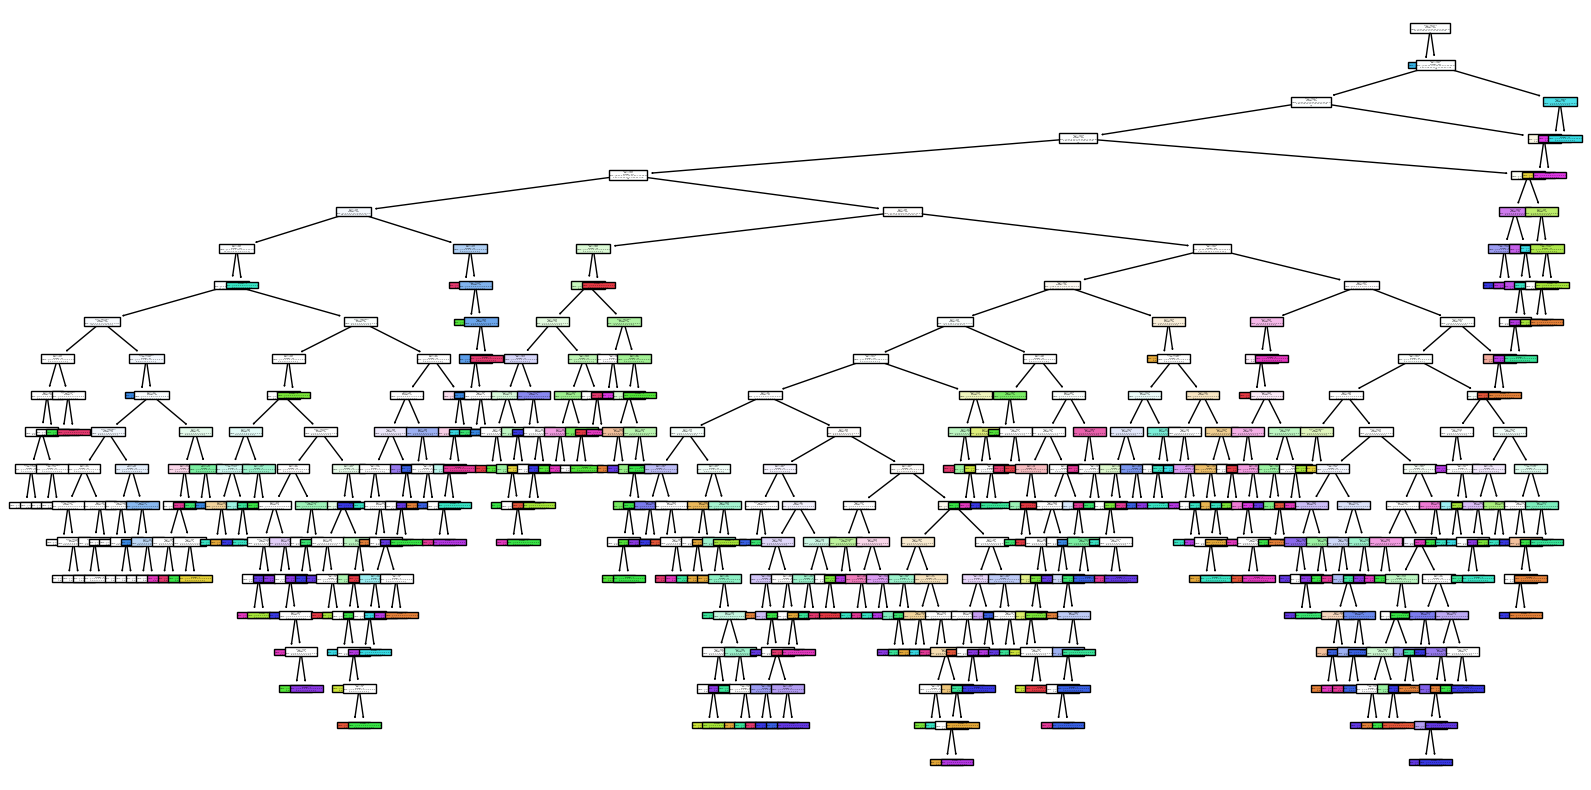

In [35]:
#plot the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True)
plt.show()